
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [97]:
fraud = pd.read_csv('C:/Users/Ashwini/Desktop/ExcelRAssignments/Decision Tree/Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [98]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [99]:
label_encoder = preprocessing.LabelEncoder() 

In [100]:
fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad']) 
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,YES
1,1,Divorced,33700,134075,18,YES
2,0,Married,36925,160205,30,YES
3,1,Single,50190,193264,15,YES
4,0,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,YES
596,1,Divorced,69967,55369,2,YES
597,0,Divorced,47334,154058,0,YES
598,1,Married,98592,180083,17,NO


In [101]:
fraud['Marital.Status'] = label_encoder.fit_transform(fraud['Marital.Status']) 
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,YES
1,1,0,33700,134075,18,YES
2,0,1,36925,160205,30,YES
3,1,2,50190,193264,15,YES
4,0,1,81002,27533,28,NO
...,...,...,...,...,...,...
595,1,0,76340,39492,7,YES
596,1,0,69967,55369,2,YES
597,0,0,47334,154058,0,YES
598,1,1,98592,180083,17,NO


In [102]:
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban']) 
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [103]:
fraud['Target'] = pd.cut(fraud['Taxable.Income'], bins=[10003, 30000 ,99619], labels=['Risky', 'Good'])
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [104]:
fraud1 = fraud.drop('Taxable.Income', axis = 1)

In [105]:
fraud1['Target'] = label_encoder.fit_transform(fraud['Target']) 
fraud1['Target']

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Target, Length: 600, dtype: int32

In [106]:
x= fraud1.loc[:, fraud1.columns != "Target"]
y= fraud1['Target']

In [107]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [108]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Target, Length: 600, dtype: int32

In [109]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [110]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

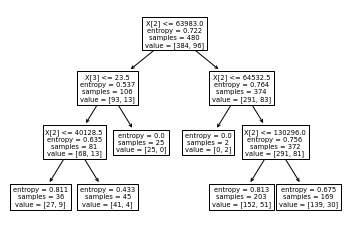

In [111]:
# decision tree plot

tree.plot_tree(model);

In [113]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() 

0    120
dtype: int64

In [115]:
np.mean(preds==y_test)

0.7666666666666667